# 09 overpass-turbo.eu comparisons

***2 Sep 2020***

This notebook compares results from osmnx's new `geometries_from_XXXX()` functions to results running the same query on https://overpass-turbo.eu.

### Notes:

1. OSMnx only processes multipolygon relations. The equivalent query on overpass-turbo is:
`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`
2. The polygon results on the overpass-turbo homepage include polygons and multipolygons
3. OSMnx will only assemble MultiPolygons where member geometries are acurately tagged with a `role`

In [3]:
%load_ext autoreload
%autoreload 2

# imports
import osmnx as ox # new `geometries` branch
import geopandas as gpd
import pandas as pd

# configuration
ox.utils.config(use_cache=True, log_console=True)
pd.set_option('display.max_columns', None)

# helper functions
from helper_functions import carto_plot, comparison_report

local_file_path = '/media/nick/WDBlue/osmnx/overpass_turbo_results/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Service roads, Tokyo

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and highway=service in Tokyo`

- points: 0
- lines: 48204
- poligons: 37

### Notes

Unclear why overpass-turbo returns an extra LineString outside of the query polygon

In [4]:
%%time
place='Tokyo, Japan'
tags={'highway': 'service'}
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 2min 2s, sys: 877 ms, total: 2min 3s
Wall time: 2min 3s


In [5]:
%%time
overpassturbo_result = gpd.read_file(local_file_path + 'highway_service_Tokyo.geojson')

CPU times: user 8.22 s, sys: 276 ms, total: 8.5 s
Wall time: 8.49 s


48240 ids that are in both GeoDataFrames

1 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/way/275466528'] 

            osmnx  overpass-turbo
LineString  48203           48204
Polygon        37              37


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


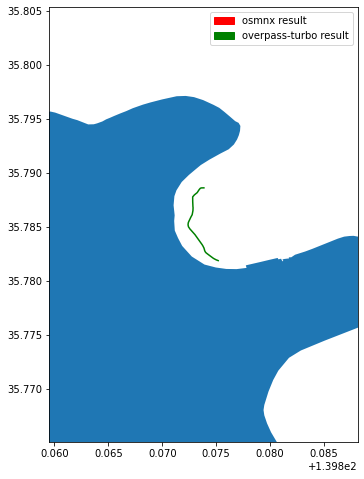

In [6]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Trees, Delhi

overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and natural=tree in Delhi`

points:825, lines: 0, poligons:0

#### Notes:

None - exact match

In [7]:
%time
place='Delhi, India'
tags={'natural': 'tree'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [8]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'natural_tree_Delhi.geojson')

In [9]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

825 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

       osmnx  overpass-turbo
Point    825             825


# Streams and power towers, Shanghai

overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and waterway=stream or power=tower in 'Shanghai, China'`

points:9390, lines: 457, poligons:0

#### Notes:

None - exact match

In [10]:
%%time
place='Shanghai, China'
tags={'waterway': 'stream', 'power': 'tower'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 5.78 s, sys: 20.1 ms, total: 5.8 s
Wall time: 5.81 s


In [11]:
# Read in the overpass-turbo.eu results
overpassturbo_result = gpd.read_file(local_file_path + 'stream_power_tower_Shanghai.geojson')

In [12]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

9847 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
Point        9390            9390
LineString    457             457


# Walls and water, Sāo Paulo

overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (wall=* or natural=water) in 'Sāo Paulo'`

- points: 0
- lines: 4
- poligons: 528

#### Notes:

The additional MultiPolygon created by osmnx shares a point with the query polygon

In [13]:
%%time
place='Sāo Paulo, Brasil'
tags={'wall': True, 'natural': 'water'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 1.34 s, sys: 4.03 ms, total: 1.35 s
Wall time: 1.35 s


In [14]:
# Read in the overpass-turbo.eu results
overpassturbo_result = gpd.read_file(local_file_path + 'wall_natural_water_Sāo_Paulo.geojson')

532 ids that are in both GeoDataFrames

1 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
['https://www.openstreetmap.org/relation/10991635']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
Polygon         527             527
LineString        5               4
MultiPolygon      1               1


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


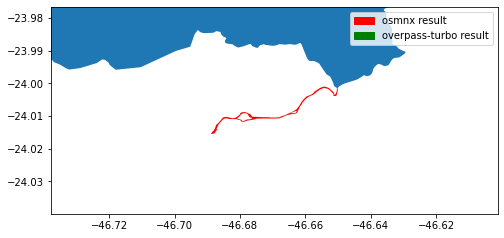

In [15]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Woods and residential land, Cairo

overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (natural=wood or landuse=residential) in 'Cairo'`

- points: 11
- lines: 0
- poligons:1731

#### Notes:

None, exact match

In [16]:
%%time
place='Cairo'
tags={'natural': 'wood', 'landuse': 'residential'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 1.07 s, sys: 12 ms, total: 1.08 s
Wall time: 1.09 s


In [17]:
# Read in the overpass-turbo.eu results
overpassturbo_result = gpd.read_file(local_file_path + 'wood_residential_Cairo.geojson')

In [18]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

1742 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

         osmnx  overpass-turbo
Polygon   1731            1731
Point       11              11


## Parking, Mumbai

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (amenity=parking or service=parking_aisle) in 'Mumbai'`

- points: 45
- lines: 32
- poligons: 88

### Notes:

None, exact match

In [19]:
%%time
place='Mumbai'
tags={'amenity': 'parking', 'service': 'parking_aisle'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 431 ms, sys: 4.04 ms, total: 435 ms
Wall time: 437 ms


In [20]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'parking_service_parking_aisle_Mumbai.geojson')

In [21]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

165 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
Polygon        88              88
Point          45              45
LineString     32              32


## Paths and power poles, Beijing

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (highway=path or power=pole) in 'Beijing'`

- points: 28
- lines: 3743
- poligons:0

### Notes:

None, exact match

In [23]:
%%time
place='Beijing'
tags={'highway': 'path', 'power': 'pole'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 8.83 s, sys: 19.9 ms, total: 8.85 s
Wall time: 8.86 s


In [24]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'path_power_pole_Beijing.geojson')

In [25]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

3771 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
LineString   3743            3743
Point          28              28


## Natural, residential, tertiary, Dhaka, Bangladesh

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (natural=* or landuse=residential or highway=tertiary) in 'Dhaka District'`

- points: 8682
- lines: 807
- poligons: 5219

### Notes

- Some issues getting osmnx and overpass-turbo to geocode to the same query polygon
- Not entirely clear why overpass-turbo includes the extra node

In [26]:
%%time
place='Dhaka District, Bangladesh'
tags={'natural': True, 'landuse': 'residential', 'highway': 'tertiary'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 3.67 s, sys: 55.9 ms, total: 3.73 s
Wall time: 3.76 s


In [27]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'natural_residential_tertiary_Dhaka.geojson')

14707 ids that are in both GeoDataFrames

1 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/node/3512879150'] 

              osmnx  overpass-turbo
Point          8681            8682
Polygon        5216            5216
LineString      807             807
MultiPolygon      3               3


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


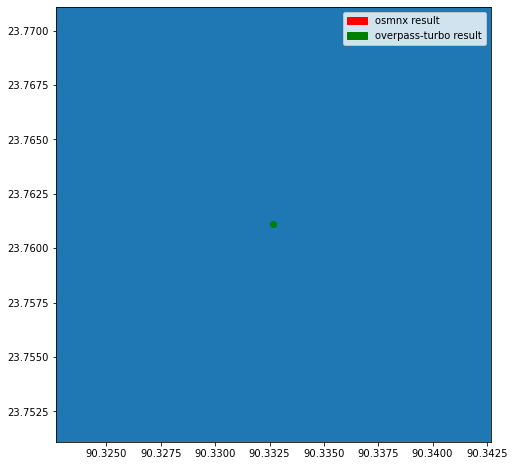

In [28]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

In [30]:
overpassturbo_result[overpassturbo_result['@id'] == 'node/3512879150'].dropna(axis=1)

,id,@id,@relations,geometry
6858,node/3512879150,node/3512879150,"[ { ""role"": ""outer"", ""rel"": 3400205, ""reltags""...",POINT (90.33267 23.76109)


## Farmland, forest, bridge, Osaka

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (landuse=farmland or landuse=forest or bridge=yes) in 'Osaka'`

- points: 3
- lines: 11169
- poligons: 6085

### Notes

- Additional polygon in osmnx results shares a boundary with the query polygon

In [31]:
%%time
place='Osaka'
tags={'landuse': ['farmland', 'forest'], 'bridge': 'yes'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 8.09 s, sys: 136 ms, total: 8.22 s
Wall time: 8.27 s


In [32]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'farmland_forest_bridge_Osaka.geojson')

17257 ids that are in both GeoDataFrames

1 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
['https://www.openstreetmap.org/way/53203179']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
LineString    11169           11169
Polygon        6080            6079
MultiPolygon      6               6
Point             3               3


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


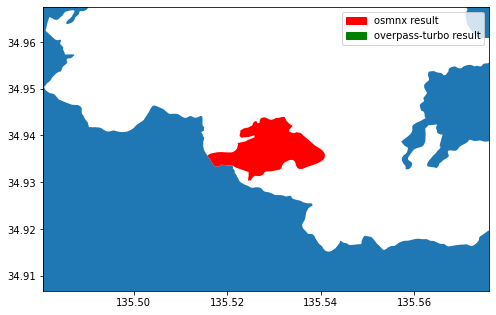

In [33]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

## Cafe, grass, New York City

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (highway=* or landuse=grass) in 'New York City'`

- points: 1580
- lines: 5
- poligons: 3184

### Notes

- The geometries missing from the osmnx result are part of a multipolygon relation but are not tagged with `role=outer`

In [34]:
%%time
place='New York City'
tags={'amenity': 'cafe', 'landuse': 'grass'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 1.65 s, sys: 12 ms, total: 1.66 s
Wall time: 1.68 s


In [35]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'cafe_grass_New_York_City.geojson')

4764 ids that are in both GeoDataFrames

5 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/way/387468103', 'https://www.openstreetmap.org/way/387468104', 'https://www.openstreetmap.org/way/387468723', 'https://www.openstreetmap.org/way/387468724', 'https://www.openstreetmap.org/way/478534136'] 

               osmnx  overpass-turbo
Polygon       3175.0            3170
Point         1580.0            1580
MultiPolygon     9.0              14
LineString       NaN               5


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


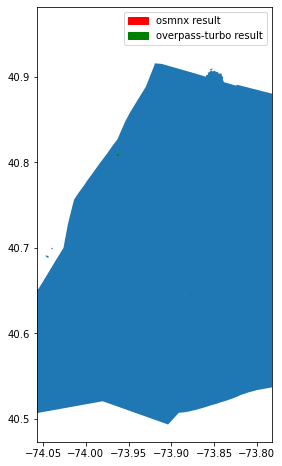

In [37]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

## Nightclub, New Alresford, Hampshire

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (amenity=nightclub) in 'New Alresford, Hampshire'`

- points: 0
- lines: 0
- poligons: 0

### Notes

Testing creation of empty GeoDataFrame from empty overpass response

In [38]:
%%time
place='New Alresford, Hampshire'
tags={'amenity': 'nightclub'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags=tags)

CPU times: user 222 ms, sys: 4.1 ms, total: 226 ms
Wall time: 227 ms


In [39]:
osmnx_result

,geometry


## Place, Mozambique

`(type:node or type:way or (type:relation and type=multipolygon)) and place=* in "Mozambique"`

- points: 2338
- lines: 15
- polygons: 971

### Notes
- Slow because osmnx generates 589 queries to the overpass API due to the size of Mozambique
- The spatial indexing takes about as long again
- At the end, the amount of data recieved is very small
- Potentially not a very efficient way to make this kind of query
- In terms of accuracy it's very good

In [ ]:
boundary = ox.geocode_to_gdf('Mozambique')
boundary_polygon = boundary.loc[0,'geometry']

osmnx_result = ox.geometries_from_polygon(boundary_polygon, tags={'place': True})
osmnx_result.plot()

In [ ]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'place_Mozambique.geojson')

In [ ]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

## Place, Naxos, Greece

`(type:node or type:way or (type:relation and type=multipolygon)) and place=* in "Naxos, Greece"`

- points: 67
- lines: 1
- polygons: 1

### Notes

In [ ]:
query_polygon = ox.geocode_to_gdf('Naxos, Greece')
polygon = query_polygon.loc[0,'geometry']

In [ ]:
osmnx_result = ox.geometries_from_polygon(polygon, tags={'place': True})

In [ ]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'place_Naxos_Greece.geojson')

In [ ]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

In [ ]:
fig, ax = carto_plot(osmnx_result, left=25.3, right=25.7, bottom=36.9, top=37.25)
ax.set_facecolor('#aad3df')

In [ ]:
osmnx_result.plot()

In [ ]:
overpassturbo_result.plot()

In [ ]:
osmnx_result[osmnx_result['geometry'].geom_type.isin(['MultiPolygon'])].dropna(axis=1)